In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [7]:
# Set path to data
dfmain=pd.read_csv('mushrooms.csv')

Class (y): 
   - edible: 4208 (51.8%) --> 'e'
   - poisonous: 3916 (48.2%) --> 'p'

In [9]:
# Add column names
# dfmain.columns = ['class'] + list(attr.keys())
dfmain.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g


#### Check for missing values

In [10]:
dfmain.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### Split training features and output class

In [11]:
Xmain = dfmain[dfmain.columns[~dfmain.columns.isin(['class'])]]
y = dfmain['class']

In [12]:
Xmain.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

#### Check proportion of each class

In [13]:
dfmain.groupby(['class'])['class'].count()

class
e    4208
p    3916
Name: class, dtype: int64

### Preprocessing

#### Create dummy variables

In [14]:
Xmain = pd.get_dummies(Xmain)
Xmain.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [15]:
Xmain.head(2)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


#### Check for collinearity

In [16]:
x_corr = Xmain.corr()**2

All feature labels may not be visible on the plot


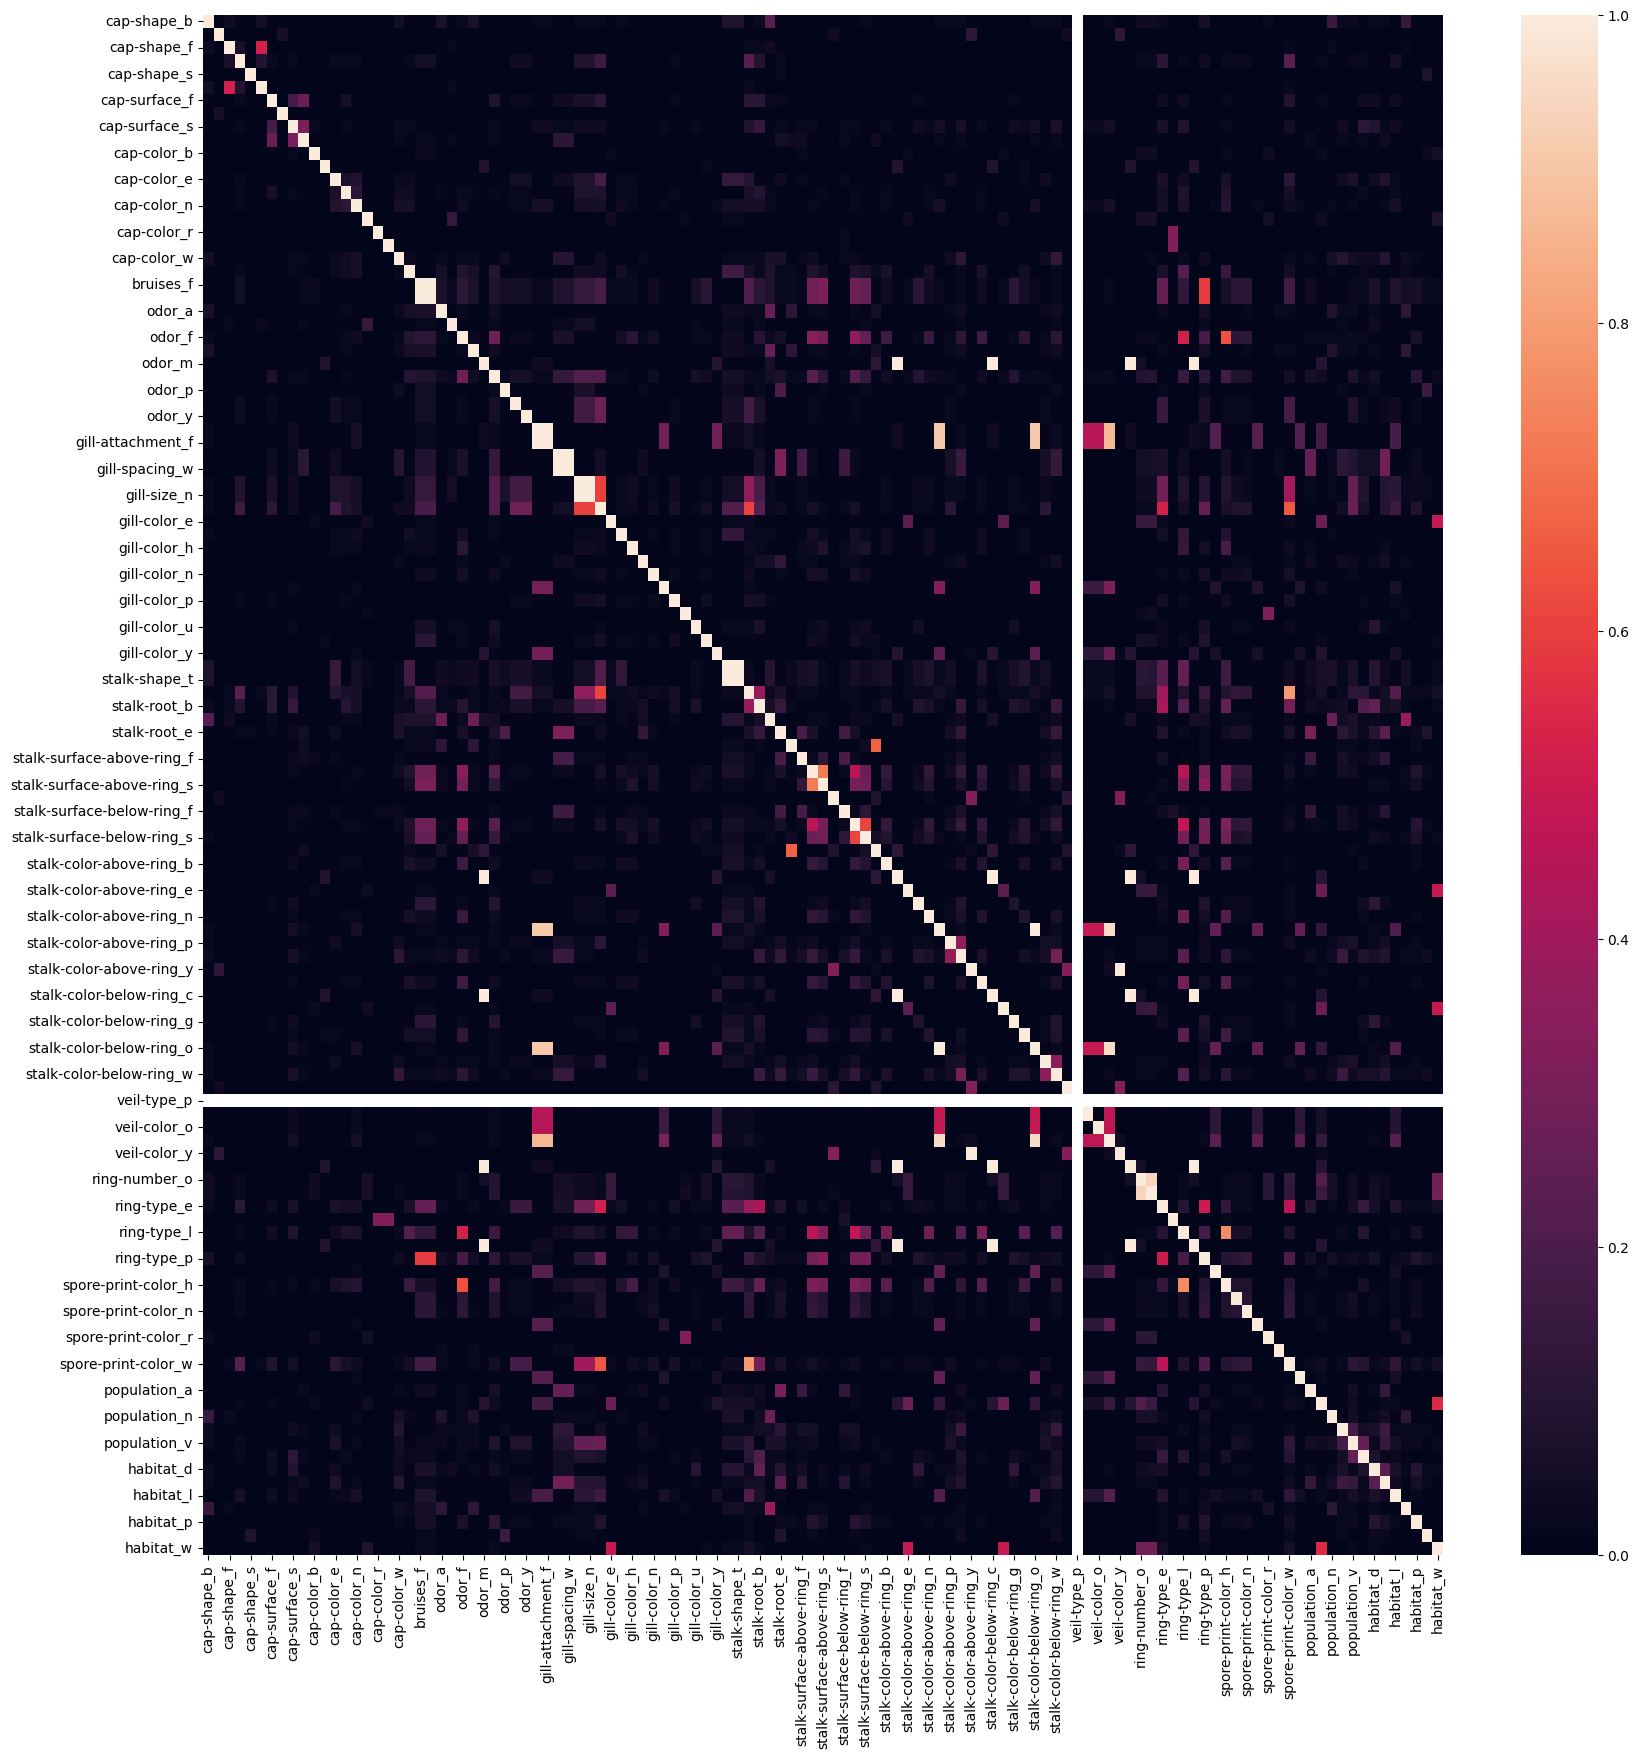

In [17]:
print("All feature labels may not be visible on the plot")
fig = plt.figure(figsize=(20,20))
sns.heatmap(x_corr.round(2)) #, annot=True)
plt.show()

In [18]:
# Remove correlated columns or features

def remove_colinear_cols(X):
    cols = list(X.columns)
    print("Numer of features (before):", len(cols))
    
    for col in cols:
        for icol in cols:
            if(col!=icol):
                rsq = np.corrcoef(X[col], X[icol])[0,1]**2
                if((rsq >=0.7) | (rsq <= -0.7)):
                    cols.remove(icol)
    print('Number of features (after):', len(cols))
    return cols

# Update keep only non-colinear features
new_cols = remove_colinear_cols(Xmain)

Numer of features (before): 117


C:\Users\palsa\python310\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\palsa\python310\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Number of features (after): 100


In [19]:
# With colinearity
#X = Xmain.copy()

# Removed colinearity
X = Xmain[new_cols]
X.shape

(8124, 100)

#### Remove columns with zero variability

In [20]:
X = X[X.columns[~X.columns.isin(['veil-type_p'])]]
X.shape

(8124, 99)

#### Plot 

All feature labels may not be visible on the plot


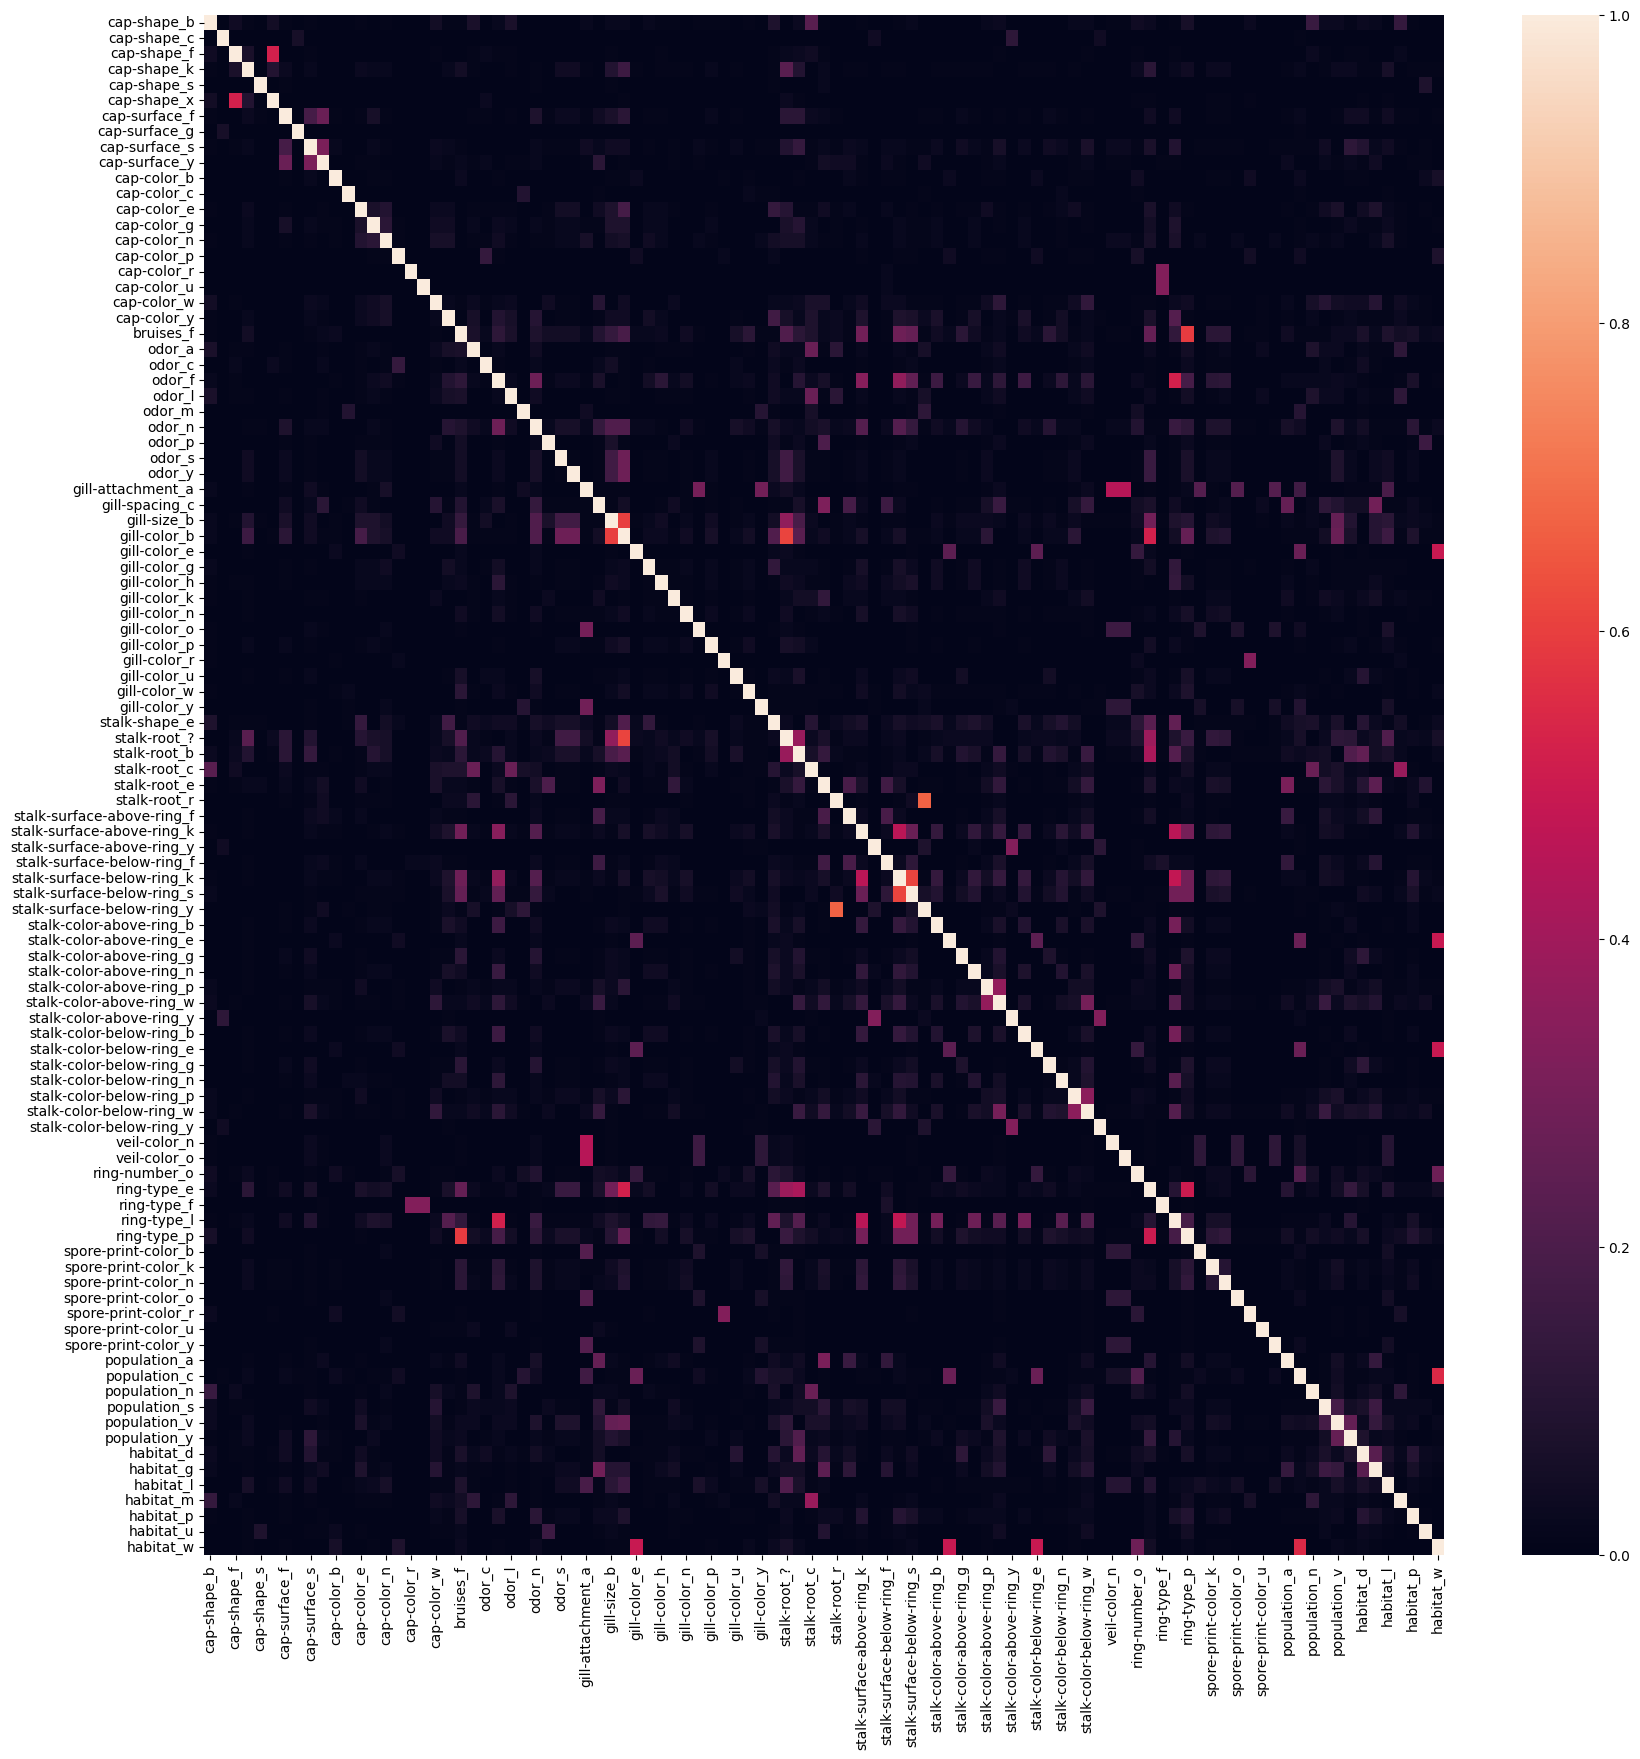

In [21]:
x_corr = X.corr()**2

print("All feature labels may not be visible on the plot")
fig = plt.figure(figsize=(20,20))
sns.heatmap(x_corr.round(2)) #, annot=True)
plt.show()

#### Split data

In [22]:
X = np.array(X)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6093, 99) (2031, 99) (6093,) (2031,)


In [24]:
6093+2031

8124

In [25]:
dfmain.shape

(8124, 23)

### Model

In [26]:
def fit_predict(clf):
    print('#'*25)
    print(clf)
    
    # Train
    clf.fit(x_train, y_train)
    
    # Predict
    y_pred = clf.predict(x_test)
    
    # Accuracy
    acu = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy: ", acu)
    
    # Confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", cm)
    
    return acu, cm

In [27]:
results = []

for clf, name in (
                (linear_model.LogisticRegression(penalty='l2', tol=1e-2, solver='liblinear'), 'Logistic Regression Classifier'),
                (linear_model.RidgeClassifier(alpha=0.5, tol=1e-2, solver='auto'), 'Ridge Classifier'),
                (linear_model.Perceptron(penalty='elasticnet', max_iter=50), 'Perceptron'),
                (linear_model.PassiveAggressiveClassifier(tol=1e-2, max_iter=50), 'Passive Aggresive Classifier'),
                (LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.5), 'LDA'),
                (QuadraticDiscriminantAnalysis(reg_param=0.5), 'QDA')
                ):
    
    print('#'*25, '\n')
    print(name)
    results.append((fit_predict(clf), name))
    
for penalty in ['l2', 'l1', 'elasticnet']:
    print('#'*25)
    print('SGD Classifier: %s penalty' % penalty.upper())
    
    results.append((fit_predict(linear_model.SGDClassifier(alpha=1e-2, max_iter=50, penalty=penalty)), 'SGD Classifier'))

######################### 

Logistic Regression Classifier
#########################
LogisticRegression(solver='liblinear', tol=0.01)
Accuracy:  1.0
Confusion matrix:
 [[1063    0]
 [   0  968]]
######################### 

Ridge Classifier
#########################
RidgeClassifier(alpha=0.5, tol=0.01)
Accuracy:  1.0
Confusion matrix:
 [[1063    0]
 [   0  968]]
######################### 

Perceptron
#########################
Perceptron(max_iter=50, penalty='elasticnet')
Accuracy:  0.9965534219596258
Confusion matrix:
 [[1061    2]
 [   5  963]]
######################### 

Passive Aggresive Classifier
#########################
PassiveAggressiveClassifier(max_iter=50, tol=0.01)
Accuracy:  1.0
Confusion matrix:
 [[1063    0]
 [   0  968]]
######################### 

LDA
#########################
LinearDiscriminantAnalysis(shrinkage=0.5, solver='lsqr')
Accuracy:  0.9857213195470211
Confusion matrix:
 [[1063    0]
 [  29  939]]
######################### 

QDA
#########################
Quadr

C:\Users\palsa\python310\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy:  0.9709502708025604
Confusion matrix:
 [[1053   10]
 [  49  919]]
#########################
SGD Classifier: L2 penalty
#########################
SGDClassifier(alpha=0.01, max_iter=50)
Accuracy:  0.9960610536681438
Confusion matrix:
 [[1063    0]
 [   8  960]]
#########################
SGD Classifier: L1 penalty
#########################
SGDClassifier(alpha=0.01, max_iter=50, penalty='l1')
Accuracy:  0.9842442146725751
Confusion matrix:
 [[1063    0]
 [  32  936]]
#########################
SGD Classifier: ELASTICNET penalty
#########################
SGDClassifier(alpha=0.01, max_iter=50, penalty='elasticnet')
Accuracy:  0.9945839487936977
Confusion matrix:
 [[1063    0]
 [  11  957]]


In [28]:
results

[((1.0,
   array([[1063,    0],
          [   0,  968]], dtype=int64)),
  'Logistic Regression Classifier'),
 ((1.0,
   array([[1063,    0],
          [   0,  968]], dtype=int64)),
  'Ridge Classifier'),
 ((0.9965534219596258,
   array([[1061,    2],
          [   5,  963]], dtype=int64)),
  'Perceptron'),
 ((1.0,
   array([[1063,    0],
          [   0,  968]], dtype=int64)),
  'Passive Aggresive Classifier'),
 ((0.9857213195470211,
   array([[1063,    0],
          [  29,  939]], dtype=int64)),
  'LDA'),
 ((0.9709502708025604,
   array([[1053,   10],
          [  49,  919]], dtype=int64)),
  'QDA'),
 ((0.9960610536681438,
   array([[1063,    0],
          [   8,  960]], dtype=int64)),
  'SGD Classifier'),
 ((0.9842442146725751,
   array([[1063,    0],
          [  32,  936]], dtype=int64)),
  'SGD Classifier'),
 ((0.9945839487936977,
   array([[1063,    0],
          [  11,  957]], dtype=int64)),
  'SGD Classifier')]